In [1]:
import numpy as np
import pandas as pd
import pyfolio as pf
import matplotlib.pyplot as plt
import nest_asyncio

import sys
opt_path = '/Users/ebellord/PycharmProjects/opt_trade'
if  opt_path not in sys.path:
    sys.path.append(opt_path)

from ib_insync import *
util.startLoop()

In [11]:
ib = IB()
ib.connect('127.0.0.1', port=4001, clientId=30)
vix = Future('VIX', includeExpired=False)
cds = ib.reqContractDetails(vix)

contracts = [cd.contract for cd in cds]
# Remove weeklys
# contracts = [contract for contract in contracts if len(contract.localSymbol) <= 4]

barsList = []
for contract in contracts:
    bars = ib.reqHistoricalData(
                    contract,
                    endDateTime='',
                    durationStr='1 D',
                    barSizeSetting='1 day',
                    whatToShow='TRADES',
                    useRTH=True,
                    formatDate=1)
    if bars:
        barsList.append(util.df(bars)) 

ib.disconnect()

Error 162, reqId 15: Historical Market Data Service error message:HMDS query returned no data: VXX9@CFE Trades, contract: Future(conId=353803310, symbol='VIX', lastTradeDateOrContractMonth='20191120', multiplier='1000', exchange='CFE', currency='USD', localSymbol='VXX9', tradingClass='VX')
Error 162, reqId 16: Historical Market Data Service error message:HMDS query returned no data: VX14J9@CFE Trades, contract: Future(conId=354640827, symbol='VIX', lastTradeDateOrContractMonth='20190403', multiplier='1000', exchange='CFE', currency='USD', localSymbol='VX14J9', tradingClass='VX14')
Error 162, reqId 17: Historical Market Data Service error message:HMDS query returned no data: VX15J9@CFE Trades, contract: Future(conId=355387498, symbol='VIX', lastTradeDateOrContractMonth='20190410', multiplier='1000', exchange='CFE', currency='USD', localSymbol='VX15J9', tradingClass='VX15')


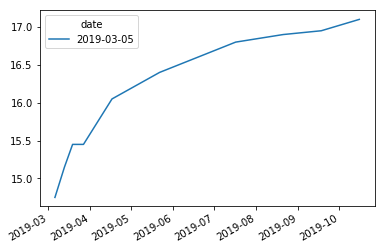

In [32]:
contract_df = util.df(contracts)
close_list = [item.loc[:,['date', 'close']] for item in barsList]
close_list = [item.set_index('date') for item in close_list]

close_list = [item.rename(index=str, columns={'close':name}) 
              for item, name in zip(close_list,
                                    pd.to_datetime(contract_df['lastTradeDateOrContractMonth']))]

# return_list = [item.pct_change().dropna(how='any') for item in close_list]

# all_returns = pd.concat(return_list, axis=1, sort=False)
# all_returns.style.format('{:.2%}')
foo = pd.concat(close_list, axis=1, sort=False)
foo.transpose().sort_index().plot()

In [26]:
foo =pd.to_datetime(contract_df['lastTradeDateOrContractMonth'])
foo

0    2019-03-19
1    2019-04-17
2    2019-05-22
3    2019-06-19
4    2019-07-17
5    2019-08-21
6    2019-09-18
7    2019-10-16
8    2019-03-06
9    2019-03-13
10   2019-03-27
11   2019-11-20
12   2019-04-03
13   2019-04-10
Name: lastTradeDateOrContractMonth, dtype: datetime64[ns]

In [14]:
util.df(contracts)

,secType,conId,symbol,lastTradeDateOrContractMonth,strike,right,multiplier,exchange,primaryExchange,currency,localSymbol,tradingClass,includeExpired,secIdType,secId,comboLegsDescrip,comboLegs,deltaNeutralContract
0,FUT,323072528,VIX,20190319,0.0,,1000,CFE,,USD,VXH9,VX,False,,,,None,None
1,FUT,326501438,VIX,20190417,0.0,,1000,CFE,,USD,VXJ9,VX,False,,,,None,None
2,FUT,331364306,VIX,20190522,0.0,,1000,CFE,,USD,VXK9,VX,False,,,,None,None
3,FUT,334361431,VIX,20190619,0.0,,1000,CFE,,USD,VXM9,VX,False,,,,None,None
4,FUT,338146256,VIX,20190717,0.0,,1000,CFE,,USD,VXN9,VX,False,,,,None,None
5,FUT,343395828,VIX,20190821,0.0,,1000,CFE,,USD,VXQ9,VX,False,,,,None,None
6,FUT,347410095,VIX,20190918,0.0,,1000,CFE,,USD,VXU9,VX,False,,,,None,None
7,FUT,351024203,VIX,20191016,0.0,,1000,CFE,,USD,VXV9,VX,False,,,,None,None
8,FUT,351180678,VIX,20190306,0.0,,1000,CFE,,USD,VX10H9,VX10,False,,,,None,None
9,FUT,351946659,VIX,20190313,0.0,,1000,CFE,,USD,VX11H9,VX11,False,,,,None,None


In [9]:
barsList

[         date   open   high    low  close  volume  barCount  average
 0  2019-03-04  14.65  16.45  14.45  15.25  137467     33226    15.63
 1  2019-03-05  15.35  15.80  15.20  15.45   56613     14732    15.50,
          date   open   high    low  close  volume  barCount  average
 0  2019-03-04  15.45  16.50  15.35  15.90   63179     17605   16.015
 1  2019-03-05  15.90  16.25  15.85  16.05   31584      8123   16.035,
          date   open   high   low  close  volume  barCount  average
 0  2019-03-04  16.00  16.70  15.9  16.35   15769      5345   16.345
 1  2019-03-05  16.35  16.65  16.3  16.40    8374      2489   16.435,
          date   open   high   low  close  volume  barCount  average
 0  2019-03-04  16.25  16.85  16.2  16.55    8015      2474    16.55
 1  2019-03-05  16.50  16.75  16.5  16.60    3713      1150    16.62,
          date   open   high    low  close  volume  barCount  average
 0  2019-03-04  16.50  17.00  16.45  16.75    4172      1286   16.775
 1  2019-03-05  16.75 